# Time Series Web Traffic Forecasting

Web Traffic Forecasting enables enterprises to optimize web server allocation, scaling for instances, parallelise workload traffic and utilization by generating 30 days of forward forecast of web traffic data. This helps enterprises to plan their IT infrastructure strategy across the cloud and on premise scenarios. It facilitates seamless end user experience and satisfied customers. It uses Prophet which is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

## Contents

1. Prequisites
1. Data Dictionary
1. Import Libraries
1. Sample Input Data
1. Create Model
1. Create Future Data
1. Predict Future Datapoints
1. Plot the DataFrame
1. Saving Forcast

### Prerequisites

To run this algorithm you need to have install following packages:
- "pandas" to read/save csv files.
- "pystan==2.19.1.1"
- "prophet" to forcast data.



### Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model   will not perform as expected
1. Have an unique identifier column called 'maskedsku'. eg. 'maskedsku' can be shipmentid
2. The date format of the columns should be: 'YYYY-MM-DD'

## Import Libraries

In [1]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Sample input data

In [2]:
# read the sample csv
df = pd.read_csv("sample.csv",index_col = [0])
df.T.head()


maskedsku,product_1
2017-05-01,13380.82192
2017-06-01,15244.93151
2017-07-01,14925.20548
2017-08-01,13585.97260
2017-09-01,11365.47945


### Transform the data

In [3]:
# naming is required as per prophet conditions.
df = df.T.copy().reset_index().rename(mapper={'index':'ds','product_1':'y'},axis = 1)
df.head()

maskedsku,ds,y
0,2017-05-01,13380.82192
1,2017-06-01,15244.93151
2,2017-07-01,14925.20548
3,2017-08-01,13585.97260
4,2017-09-01,11365.47945


## Create Model

Now we use the Prophet Package to create a model.\
Fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe.

In [4]:
m = Prophet()
m.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Create the future data

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [5]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
60,2020-03-27
61,2020-03-28
62,2020-03-29
63,2020-03-30
64,2020-03-31


# Predict Future datapoints

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60,2020-03-27,47666.478532,45964.418106,49444.510247
61,2020-03-28,41579.285917,39821.098770,43338.322560
62,2020-03-29,35132.914642,33371.599434,36926.374621
63,2020-03-30,28425.912863,26567.938756,30331.505212
64,2020-03-31,21561.850487,19697.841803,23261.682954


## Plot the forecast dataframe
You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

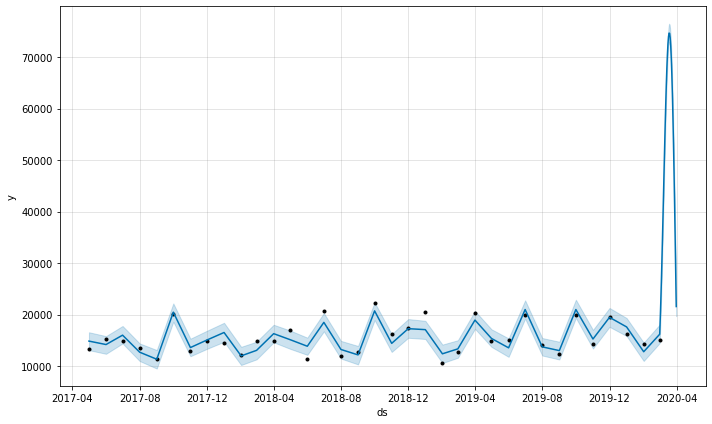

In [7]:
# Python
fig1 = m.plot(forecast)

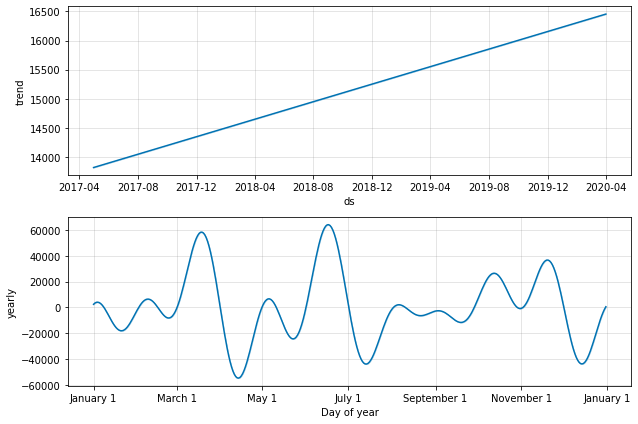

In [8]:
# Python
fig2 = m.plot_components(forecast)

## Saving Forecast

In [9]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.to_csv('output.csv',index=False)

In [10]:
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2017-05-01,14851.643993,13095.621291,16569.507002
1,2017-06-01,14182.977108,12381.801455,15819.566169
2,2017-07-01,16003.753632,14397.778177,17789.255556
3,2017-08-01,12694.691263,10981.578820,14394.775395
4,2017-09-01,11328.972838,9518.809274,13117.880769
...,...,...,...,...
60,2020-03-27,47666.478532,45964.418106,49444.510247
61,2020-03-28,41579.285917,39821.098770,43338.322560
62,2020-03-29,35132.914642,33371.599434,36926.374621
63,2020-03-30,28425.912863,26567.938756,30331.505212
